In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv('exposure.csv')
df.head()

nan_index = df[df['total_villages'].isna()].index
nan_index
df.drop(nan_index, inplace=True)


In [2]:
Flood_Incidence = ['flood_freq', 'cum_flood', 'cnt_flood_yr']
Hydro_Climatic = ['lpa_total_rainfall','rainfall_2020','date_mons','coef_variation']
Bio_physical = ['fcover_sq_km','forest_gain_total','floss_total','crp_sq_km','aridity','rugged','elev_mean','bdod', 'cec', 'cfvo', 'clay', 'sand', 'silt', 'phh_20', 'soc', 'ocd', 'ocs']
common_cols = ["state_code", "state_name", "district_code", "district_name", "block_code", "block_name", "stcode11", "dtcode11", "blkcode11", "FID_Key", "total_villages", "total_vill_survey_completed", "geog_area"]

flood_df = df[common_cols+Flood_Incidence+Hydro_Climatic+Bio_physical]

flood_df.describe()


,state_code,district_code,block_code,stcode11,FID_Key,total_villages,total_vill_survey_completed,geog_area,flood_freq,cum_flood,...,bdod,cec,cfvo,clay,sand,silt,phh_20,soc,ocd,ocs
count,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,...,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000
mean,19.341761,362.445132,3424.547300,19.834537,3745.094943,102.657035,99.815789,454.258518,22.274682,0.148589,...,143.126953,230.757194,146.974353,337.467619,310.163149,327.369316,68.124476,80.380491,99.888676,39.781983
std,9.939901,195.296011,1951.678198,10.560996,1998.009389,81.613096,77.070868,489.347425,14.122905,0.528754,...,11.754428,83.228277,56.584854,55.012590,72.838941,61.011689,6.857454,46.284306,17.641565,9.578615
min,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.983090,0.000000,0.000000,...,107.395499,80.043655,37.402699,145.350961,38.138640,145.655985,49.311965,25.237709,63.879354,16.115862
25%,9.000000,192.000000,1709.250000,9.000000,1977.250000,41.000000,41.000000,190.527795,13.000000,0.000594,...,136.419535,164.233556,98.470647,294.455293,272.214017,282.559869,64.842505,51.637618,88.315960,32.902423
50%,20.000000,356.000000,3407.500000,20.000000,3670.500000,86.000000,85.000000,302.410125,21.000000,0.009553,...,142.600604,210.013355,141.158068,338.941546,315.795812,323.571462,69.859430,66.349440,96.881752,39.104807
75%,27.000000,517.000000,5085.750000,27.000000,5519.750000,141.000000,137.000000,571.937162,32.000000,0.076193,...,150.036028,287.739122,190.091568,378.832196,354.758676,368.389900,72.529786,90.849169,104.538602,44.496206
max,38.000000,734.000000,7417.000000,39.000000,7133.000000,734.000000,663.000000,16972.130590,60.000000,12.464970,...,172.813008,496.172077,347.018141,520.814922,629.746447,612.545306,88.590270,512.910903,222.022184,76.376847


In [4]:
from sklearn.preprocessing import StandardScaler, RobustScaler

flood_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5814 entries, 0 to 5814
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state_code                   5814 non-null   int64  
 1   state_name                   5814 non-null   object 
 2   district_code                5814 non-null   int64  
 3   district_name                5814 non-null   object 
 4   block_code                   5814 non-null   int64  
 5   block_name                   5814 non-null   object 
 6   stcode11                     5814 non-null   int64  
 7   dtcode11                     5814 non-null   object 
 8   blkcode11                    5814 non-null   object 
 9   FID_Key                      5814 non-null   int64  
 10  total_villages               5814 non-null   float64
 11  total_vill_survey_completed  5814 non-null   int64  
 12  geog_area                    5814 non-null   float64
 13  flood_freq             

In [5]:
float_cols = flood_df.select_dtypes(include=['float64','int64']).columns
float_cols

Index(['state_code', 'district_code', 'block_code', 'stcode11', 'FID_Key',
       'total_villages', 'total_vill_survey_completed', 'geog_area',
       'flood_freq', 'cum_flood', 'cnt_flood_yr', 'lpa_total_rainfall',
       'rainfall_2020', 'coef_variation', 'fcover_sq_km', 'forest_gain_total',
       'floss_total', 'crp_sq_km', 'aridity', 'rugged', 'elev_mean', 'bdod',
       'cec', 'cfvo', 'clay', 'sand', 'silt', 'phh_20', 'soc', 'ocd', 'ocs'],
      dtype='object')

In [6]:
remove_cols = ['state_code', 'district_code','stcode11','total_vill_survey_completed']

df = flood_df[float_cols].drop(columns=remove_cols)

In [7]:
df.columns

Index(['block_code', 'FID_Key', 'total_villages', 'geog_area', 'flood_freq',
       'cum_flood', 'cnt_flood_yr', 'lpa_total_rainfall', 'rainfall_2020',
       'coef_variation', 'fcover_sq_km', 'forest_gain_total', 'floss_total',
       'crp_sq_km', 'aridity', 'rugged', 'elev_mean', 'bdod', 'cec', 'cfvo',
       'clay', 'sand', 'silt', 'phh_20', 'soc', 'ocd', 'ocs'],
      dtype='object')

In [8]:
df['aridity'].describe()
df['bdod'].describe()

count    5814.000000
mean      143.126953
std        11.754428
min       107.395499
25%       136.419535
50%       142.600604
75%       150.036028
max       172.813008
Name: bdod, dtype: float64

In [9]:
robust_scaling_col = ['aridity','cum_flood', 'cnt_flood_yr', 'forest_gain_total', 'floss_total', 'bdod', 'cec', 'cfvo',  'clay', 'sand', 'silt',  'phh_20', 'soc', 'ocd', 'ocs', 'elev_mean']
standard_scaling_col = ['flood_freq', 'lpa_total_rainfall', 'rainfall_2020', 'coef_variation', 'fcover_sq_km', 'crp_sq_km', 'total_villages', 'geog_area']

Rscaler = RobustScaler()
StdScaler = StandardScaler()

df_scaled = df.copy()

df_scaled[robust_scaling_col] = Rscaler.fit_transform(df_scaled[robust_scaling_col])
df_scaled[standard_scaling_col] = StdScaler.fit_transform(df_scaled[standard_scaling_col])


In [10]:
main_columns = ['total_villages', 'geog_area', 'flood_freq',
       'cum_flood', 'cnt_flood_yr', 'lpa_total_rainfall', 'rainfall_2020',
       'coef_variation', 'fcover_sq_km', 'forest_gain_total', 'floss_total',
       'crp_sq_km', 'aridity', 'rugged', 'elev_mean', 'bdod', 'cec', 'cfvo',
       'clay', 'sand', 'silt', 'phh_20', 'soc', 'ocd', 'ocs']

In [11]:
df_pca = df_scaled.drop(columns=['block_code', 'FID_Key'],errors='ignore')
df_pca.replace('', np.nan, inplace=True)
df_pca = df_pca.astype(float)



In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_pca)

PCA()

In [13]:
pcaSummary_df = pd.DataFrame({
            '% variance': pca.explained_variance_ratio_,
            'Cumulative %': np.cumsum(pca.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcaSummary_df.round(3)

,% variance,Cumulative %
0,0.745,0.745
1,0.224,0.969
2,0.023,0.992
3,0.003,0.994
4,0.001,0.996
5,0.001,0.997
6,0.001,0.997
7,0.001,0.998
8,0.000,0.998
9,0.000,0.999


In [14]:
PCA_weights = pcaSummary_df['% variance'][:3]

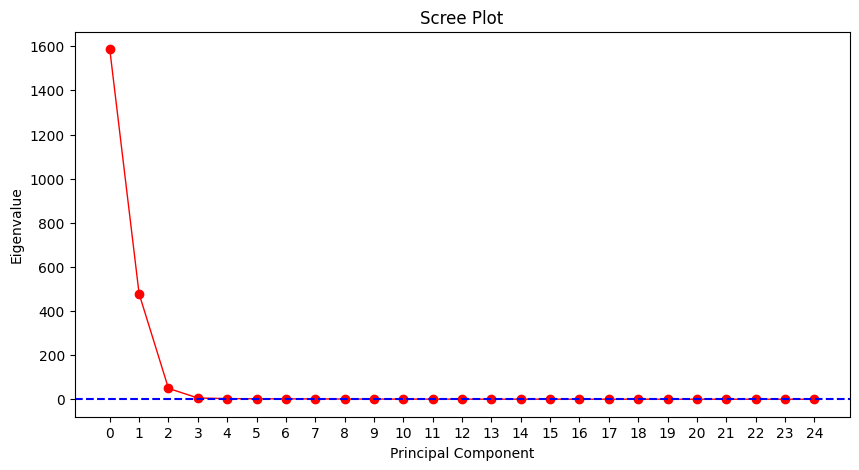

In [15]:
import matplotlib.pyplot as plt

# scree plot of eigenvalues
# define the x values, i.e., components
#Eigenvalues are given by the PCA explained_variance_ method
eig = pca.explained_variance_.round(2) #explained variance method

xvals = np.arange(df_pca.shape[1]);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

#look for inflection point --> 2 is the major inflection point 
# philip said keep points before this --> that is 2 

In [16]:
# Fit PCA for all components (you already have this)
pca = PCA(n_components=3)
pca.fit(df_pca)

# Extract loadings (weights of variables for each PC)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to align variables with components
    columns=[f"PC{i+1}" for i in range(3)],  # Name components as PC1, PC2, ...
    index=df_pca.columns  # Original variable names
)

# Display loadings
print(loadings)

                         PC1       PC2       PC3
total_villages      0.001751  0.005401  0.010525
geog_area           0.003758  0.008580  0.001451
flood_freq         -0.002084 -0.003282  0.037578
cum_flood          -0.005202 -0.006092  0.996557
cnt_flood_yr       -0.001929  0.000015  0.036477
lpa_total_rainfall  0.008874  0.002466  0.022947
rainfall_2020       0.006675  0.003157  0.018868
coef_variation     -0.005833 -0.001993 -0.019305
fcover_sq_km        0.013382  0.018334 -0.001772
forest_gain_total   0.143388  0.989233  0.006597
floss_total         0.989254 -0.143954  0.003452
crp_sq_km          -0.003675 -0.000304 -0.003131
aridity             0.012206  0.004130  0.026117
rugged              0.000448  0.000263 -0.000763
elev_mean           0.003699  0.008218 -0.023931
bdod               -0.006491  0.000606 -0.014071
cec                -0.001835  0.003468 -0.013256
cfvo                0.003820  0.004573 -0.013827
clay                0.000589  0.002788 -0.004847
sand                

In [17]:
# Add PCA scores to the DataFrame with renamed components
pca_scores = pca.transform(df_pca)

# Assign PCA scores to their respective components
for i, name in enumerate(loadings.columns):
    df_scaled[f"Flood_Exposure_{name}"] = pca_scores[:, i]

# Check the updated DataFrame
print(df_scaled.head())

   block_code  FID_Key  total_villages  geog_area  flood_freq  cum_flood  \
0        6498        1       -1.172180   1.523107   -1.577338  -0.126365   
1        6492        4       -0.253131   2.149262   -1.577338  -0.126365   
2        4689       56       -0.890339  -0.334097    0.051362  -0.123563   
3        4690       57       -1.049640  -0.327041    0.051362  -0.124304   
4        4692       58       -1.025132  -0.233529    0.051362  -0.071294   

   cnt_flood_yr  lpa_total_rainfall  rainfall_2020  coef_variation  ...  \
0     -0.666667            1.778727       0.531646       -0.016155  ...   
1     -0.666667            2.686935       2.829796       -0.751939  ...   
2     -0.444444           -1.159896      -1.296925        0.448423  ...   
3     -0.555556           -1.240669      -1.369322        0.373477  ...   
4     -0.333333           -1.371590      -1.483235        0.445104  ...   

       clay      sand      silt    phh_20       soc       ocd       ocs  \
0  0.335602  0.06

In [19]:
# Multiply each PCA component score by its weight
df["flood_exposure_Index"] = (
    PCA_weights[0] * df_scaled["Flood_Exposure_PC1"] +
    PCA_weights[1] * df_scaled["Flood_Exposure_PC2"] +
    PCA_weights[2] * df_scaled["Flood_Exposure_PC3"] 
)

# Display the flood_exposure Index
print(df[["block_code", "flood_exposure_Index"]].head())

   block_code  flood_exposure_Index
0        6498             88.816916
1        6492             80.811839
2        4689             -7.444609
3        4690             -7.508696
4        4692             -7.524426


In [20]:
df["flood_exposure_Index"].describe()


count    5.814000e+03
mean     3.910796e-16
std      3.006049e+01
min     -7.570344e+00
25%     -7.448895e+00
50%     -7.231600e+00
75%     -5.829554e+00
max      5.333315e+02
Name: flood_exposure_Index, dtype: float64